<h2>0. Importando as bibliotecas</h2>

In [3]:
# manipulacao de dados
import pandas as pd
import numpy as np

# visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns

# divisao de dados
from sklearn.model_selection import train_test_split 

# pre-processamento e modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modelos de classificacao
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metricas de avaliacao
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,roc_curve, auc

# matriz de confusão
import scikitplot as skplt 

# balanceamento de dados
from imblearn.under_sampling import RandomUnderSampler

# otimizacao de hiperparametros e validacao cruzada
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# configuracoes de visualizacao
sns.set_theme(style='whitegrid')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

<h2>1. Coletando os dados</h2>

In [2]:
file_path = 'data\Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

<h2>2. Dicionario dos dados</h2>

<ul>
<li><strong>customerID:</strong> identificador único do cliente</li>
<li><strong>gender:</strong> gênero do cliente (Male/Female)</li>
<li><strong>SeniorCitizen:</strong> variável binária que indica se o cliente é idoso ou aposentado (1) ou não (0)</li>
<li><strong>Partner:</strong> variável binária que indica se o cliente tem um parceiro (Yes) ou não (No)</li>
<li><strong>Dependents:</strong> variável binária que indica se o cliente tem dependentes (Yes) ou não (No)</li>
<li><strong>tenure:</strong> quantidade de meses que o cliente tem sido um assinante dos serviços da empresa</li>
<li><strong>PhoneService:</strong> variável binária que indica se o cliente tem serviço de telefone (Yes) ou não (No)</li>
<li><strong>MultipleLines:</strong> variável que indica se o cliente tem várias linhas telefônicas (Yes), uma única linha (No) ou nenhum serviço de telefone (No phone service)</li>
<li><strong>InternetService:</strong> variável que indica se o cliente tem serviço de internet com fibra óptica (Fiber optic), com a tecnologia DSL (DSL) ou sem serviço de internet (No)</li>
<li><strong>OnlineSecurity:</strong> variável que indica se o cliente tem segurança online (Yes), sem serviço de internet (No internet service) ou sem serviço de segurança (No)</li>
<li><strong>OnlineBackup:</strong> variável que indica se o cliente tem backup online (Yes), sem backup (No) ou sem serviço de internet (No internet service)</li>
<li><strong>DeviceProtection:</strong> variável que indica se o cliente tem proteção de dispositivo (Yes), sem proteção (No) ou sem serviço de internet (No internet service)</li>
<li><strong>TechSupport:</strong> variável que indica se o cliente tem suporte técnico (Yes), sem suporte (No) ou sem serviço de internet (No internet service)</li>
<li><strong>StreamingTV:</strong> variável que indica se o cliente tem serviço de streaming de TV (Yes), sem serviço de streaming de TV (No) ou sem serviço de internet (No internet service)</li>
<li><strong>StreamingMovies:</strong> variável que indica se o cliente tem serviço de streaming de filmes (Yes), sem serviço de streaming de filmes (No) ou sem serviço de internet (No internet service)</li>
<li><strong>Contract:</strong> variável que indica o tipo de contrato que o cliente tem com a empresa (Mensal, anual ou bianual)</li>
<li><strong>PaperlessBilling:</strong> variável binária que indica se o cliente optou por fatura eletrônica (Yes) ou não (No)</li>
<li><strong>PaymentMethod:</strong> variável que indica o método de pagamento que o cliente usa (Transferência bancária automática, Cartão de crédito automático, Cheque eletrônico ou Cheque enviado)</li>
<li><strong>MonthlyCharges:</strong> valor mensal cobrado ao cliente</li>
<li><strong>TotalCharges:</strong> valor total cobrado do cliente durante o tempo que foi assinante</li>
<li><strong>Churn:</strong> variável binária que indica se o cliente cancelou o serviço (Yes) ou não (No)</li>
</ul>

<h2>3. Análise geral</h2>

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])

Linhas:  7043
Colunas:  21


In [5]:
unique_values = df.apply(lambda x: x.unique())
unique_values

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

A coluna TotalCharges representa o valor total que foi cobrado ao cliente. Ela está no tipo object, mas deveria ser float. No entanto, não é possível fazer uma conversão direta, pois há strings vazias ('') como valor na coluna.

Para resolver esse problema, usaremos a função `pd.to_numeric()` do pandas com o parâmetro `errors='coerce'`. Esse parâmetro indica que quaisquer valores não numéricos na coluna serão convertidos em NaN (valores não numéricos).

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.TotalCharges.isna().sum()

11

Após converter a coluna TotalCharges para o tipo float, 11 valores que eram ('') foram convertidos para NaN. Para identificarmos o método de preenchimento dos dados faltantes, vamos plotar um gráfico de distribuição dos dados.

<AxesSubplot: ylabel='Frequency'>

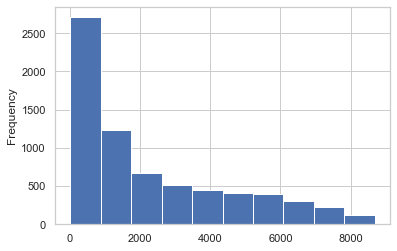

In [9]:
df.TotalCharges.plot(kind='hist')

A análise do gráfico mostrou que a distribuição dos dados é assimétrica à direita. Portanto, vamos preencher os dados faltantes com a mediana.

In [10]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace = True)

<h1>4. Análise exploratória</h1>

<h3>Coluna: Churn</h3>

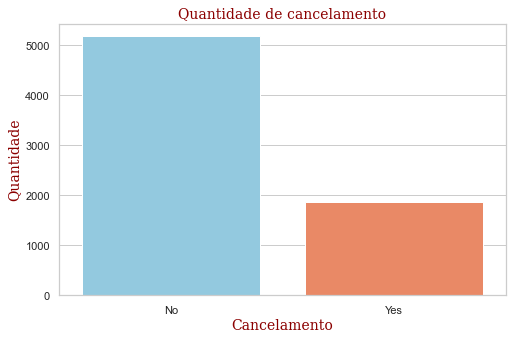

In [11]:
palette_churn = {'Yes': 'coral', 'No': 'skyblue'}

fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(
              data=df, 
              x='Churn', 
              palette=palette_churn
)

ax.set_title('Quantidade de cancelamento', fontdict=font)
ax.set_xlabel('Cancelamento', fontdict=font)
ax.set_ylabel('Quantidade', fontdict=font)
plt.show()

In [12]:
round(df.Churn.value_counts() / df.shape[0] * 100, 2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

Os dados estao desbalanceados com 26,54% de Churn

<h3>Coluna: Gender</h3>

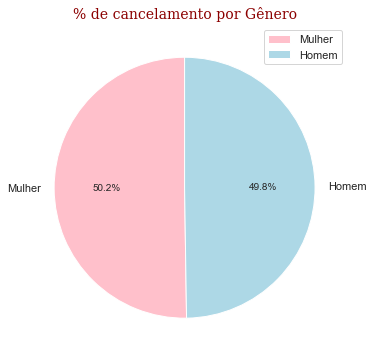

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.pie(
       x=df[df['Churn'] == 'Yes']['gender'].value_counts() / len(df), 
       labels=['Mulher', 'Homem'], 
       autopct='%1.1f%%', 
       startangle=90, 
       colors=['pink','lightblue']
)
ax.set_title('% de cancelamento por Gênero', fontdict=font)
ax.legend(['Mulher','Homem'])
plt.show()

Ao observar o gráfico acima, é evidente que a diferença é muito pequena, o que sugere que não podemos concluir que o gênero seja um fator determinante para o cancelamento.

<h3>Coluna: SeniorCitizen</h3>

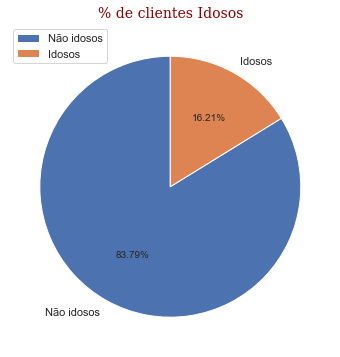

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.pie(
       x=df["SeniorCitizen"].value_counts() / len(df), 
       labels=['Não idosos', 'Idosos'], 
       autopct='%1.2f%%', 
       startangle=90, 
)
ax.set_title('% de clientes Idosos', fontdict=font)
ax.legend(['Não idosos','Idosos'])
plt.show()

Com base no gráfico acima, podemos ver que a maioria dos clientes não são idosos, com uma proporção de 83,79%. Por outro lado, a proporção de clientes idosos é de 16,21%.

<h3>Coluna: tenure(Meses assinante) por churn</h3>

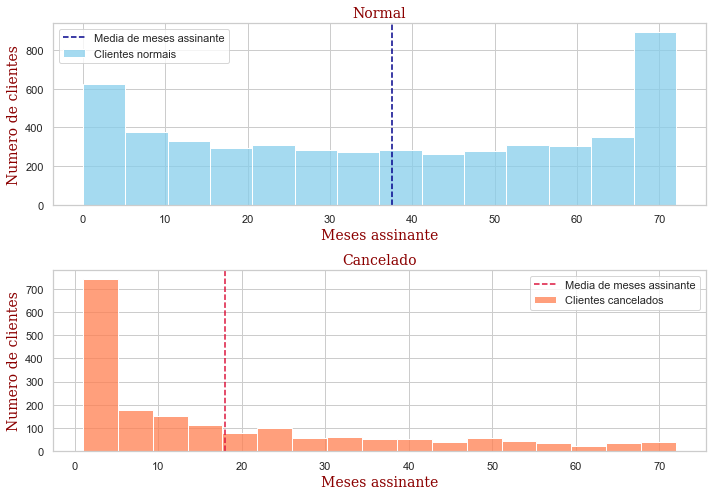

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

churn_color = ['skyblue', 'coral']
line_color = ['darkblue', 'crimson']

sns.histplot(
    data=df[df['Churn'] == 'No'],
    x='tenure',
    label='Clientes normais',
    color=churn_color[0],
    ax=ax[0]
)

ax[0].axvline(
    x=df[df['Churn'] == 'No']['tenure'].mean(),
    color=line_color[0],
    linestyle='--',
    label='Media de meses assinante'
)

ax[0].set_xlabel('Meses assinante', fontdict=font)
ax[0].set_ylabel('Numero de clientes', fontdict=font)
ax[0].set_title('Normal', fontdict=font)
ax[0].legend()

sns.histplot(
    data=df[df['Churn'] == 'Yes'],
    x='tenure',
    label='Clientes cancelados',
    color=churn_color[1],
    ax=ax[1]
)

ax[1].axvline(
    x=df[df['Churn'] == 'Yes']['tenure'].mean(),
    color=line_color[1],
    linestyle='--',
    label='Media de meses assinante'
)

ax[1].set_xlabel('Meses assinante', fontdict=font)
ax[1].set_ylabel('Numero de clientes', fontdict=font)
ax[1].set_title('Cancelado', fontdict=font)
ax[1].legend()

plt.tight_layout()
plt.show()

No gráfico <mark style="background-color: skyblue"> azul </mark>    mostra que a maioria dos clientes que continuam tem em media 37 meses de fidelidade. Isso sugere que esses clientes estão satisfeitos com os serviços da empresa e estão mais propensos a continuar sendo clientes.

No gráfico <mark style="background-color: coral"> laranja </mark> mostra que a maioria dos clientes que cancelaram tem menos de 20 meses de fidelidade. Isso sugere que os clientes estão cancelando seus serviços após um período relativamente curto de tempo.


<h3>Coluna: MonthlyCharges(Valor cobrado mensalmente) por churn</h3>

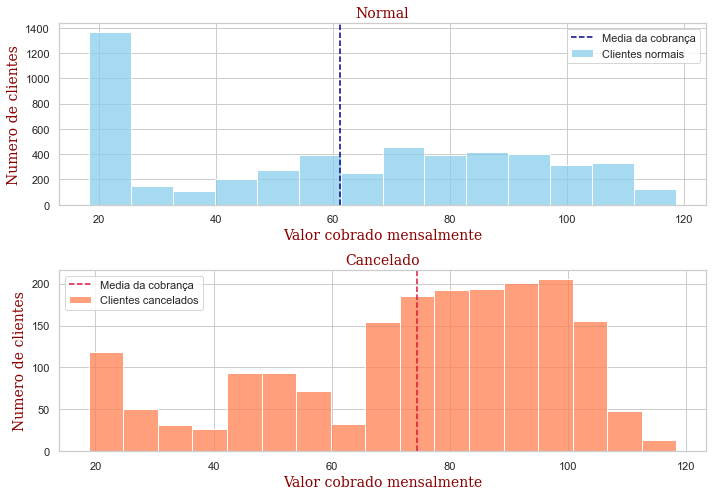

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

churn_color = ['skyblue', 'coral']
line_color = ['darkblue', 'crimson']

sns.histplot(
    data=df[df['Churn'] == 'No'],
    x='MonthlyCharges',
    label='Clientes normais',
    color= churn_color[0],
    ax=ax[0]
)

ax[0].axvline(
    x=df[df['Churn'] == 'No']['MonthlyCharges'].mean(),
    color=line_color[0],
    linestyle='--',
    label='Media da cobrança',
)

ax[0].set_xlabel('Valor cobrado mensalmente', fontdict=font)
ax[0].set_ylabel('Numero de clientes', fontdict=font)
ax[0].set_title('Normal', fontdict=font)
ax[0].legend()

sns.histplot(
    data=df[df['Churn'] == 'Yes'],
    x='MonthlyCharges',
    label='Clientes cancelados',
    color=churn_color[1],
    ax=ax[1]
)

ax[1].axvline(
    x=df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
    color=line_color[1],
    linestyle='--',
    label='Media da cobrança',
)

ax[1].set_xlabel('Valor cobrado mensalmente', fontdict=font)
ax[1].set_ylabel('Numero de clientes', fontdict=font)
ax[1].set_title('Cancelado', fontdict=font)
ax[1].legend()

plt.tight_layout()
plt.show()

Com base nos gráficos apresentados, pode-se concluir que a distribuição dos valores cobrados mensalmente é diferente entre os clientes que cancelaram e os que não cancelaram. Portanto, é possível realizar um <strong>teste de hipótese</strong> para verificar se há <strong>diferença significativa</strong> entre as médias dos valores cobrados. Mas antes vamos verificar se os dados seguem uma distribuicao normal. 

Para verificarmos, utilizaremos o teste de normalidade 'Teste de Shapiro-Wilk'

<ul>
    <li>H0: Mensalidade normal segue uma distribuição normal.</li>
    <li>H0: Mensalidade cancelada segue uma distribuição normal.</li><br>
    <li>HA: Mensalidade normal não segue uma distribuição normal.</li>
    <li>HA: Mensalidade não segue uma distribuição normal.</li>
</ul>

In [17]:
from scipy.stats import shapiro

stat, p_val = shapiro(df[df['Churn'] == 'Yes']['MonthlyCharges'])
print(f'Clientes cancelados: estatística W: {stat}, p-valor: {p_val}')

stat, p_val = shapiro(df[df['Churn'] == 'No']['MonthlyCharges'])
print(f'Clientes normais: estatística W: {stat}, p-valor: {p_val}')

Clientes cancelados: estatística W: 0.9284037947654724, p-valor: 5.367294717402582e-29
Clientes normais: estatística W: 0.9129106402397156, p-valor: 0.0


Os valores de p para os dois grupos foram menores que o nível de significância de 0.05, o que indica que há evidências suficientes para concluir que as distribuições das mensalidades não são normais. Por conta disso utilizaremos <strong>testes não paramétricos.</strong>

Os 'testes não paramétricos' não fazem nenhuma suposição sobre a distribuição dos dados, o que os torna mais robustos e adequados para essa situação.

<ul>
    <li>H0: Media normal  = Media cancelamento</li>
    <li>HA: Media normal != Media cancelamento</li>
</ul>

In [18]:
from scipy.stats import mannwhitneyu

monthly_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
monthly_charges_not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

stat, p_val = mannwhitneyu(x=monthly_charges_churned, y=monthly_charges_not_churned)

print(f'U-statistic: {stat}')
print(f'p-value: {p_val}')

U-statistic: 6003125.5
p-value: 3.311627651988585e-54


Como o p-valor é menor que 0.05, podemos rejeitar a hipótese nula (H0) e concluir que quando <strong>há cancelamento</strong>, os <strong>valores</strong> cobrados <strong>mensalmente</strong> são <strong>maiores</strong>.

<h3>Coluna: Contract(Contrato)</h3>

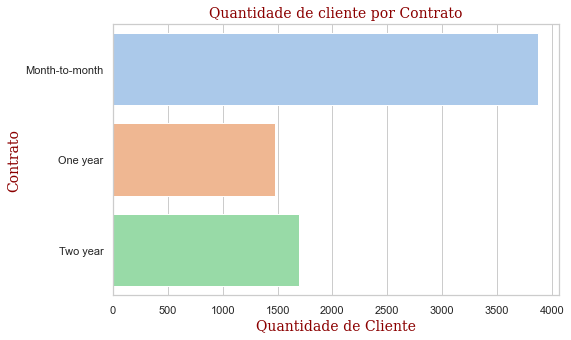

In [19]:
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(data=df, y='Contract',palette = 'pastel')

ax.set_title('Quantidade de cliente por Contrato', fontdict=font)
ax.set_xlabel('Quantidade de Cliente', fontdict=font)
ax.set_ylabel('Contrato', fontdict=font)
plt.show()

Podemos notar que a grande maioria dos clientes possui um contrato mensal, seguido pelo contrado de dois anos e, por último, o contrato anual. Indicando que a empresa possui uma proporção maior de clientes com contratos de curto prazo.

Vamos analisar a proporção dos contratos cancelados.

In [20]:
round(df[df["Churn"] == "Yes"]["Contract"].value_counts() / df.shape[0] * 100, 2)

Month-to-month    23.50
One year           2.36
Two year           0.68
Name: Contract, dtype: float64

Os contratos mensais apresentam a maior taxa de cancelamento, com 23,50%. Os contratos anuais e binuais apresentam taxas de cancelamento abaixo de 3%.

<h3>Coluna: tenure(Meses assinante) por tipo de Contract(contrato)</h3>

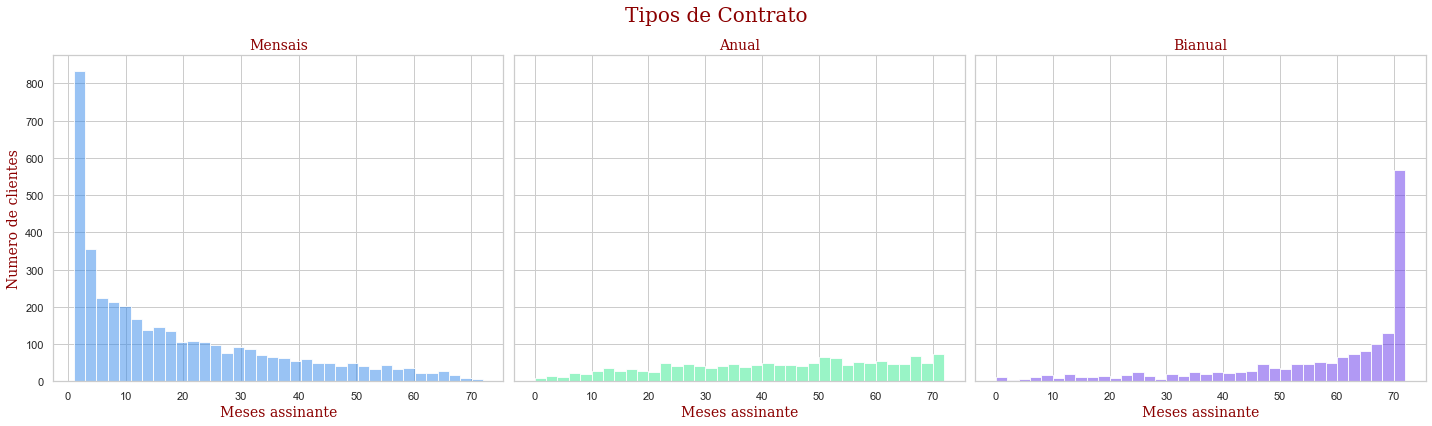

In [21]:
font_tittle = {'family': 'serif',
               'color':  'darkred',
               'weight': 'normal'
              }

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(20, 6))

contract_color = ['#3489eb', '#34eb8f', '#6434eb']

sns.histplot(
    data=df[df['Contract'] == 'Month-to-month'],
    x='tenure',
    label='Clientes normais',
    ax=ax1,
    bins=36,
    color=contract_color[0],
    alpha=0.5
)

ax1.set_xlabel('Meses assinante', fontdict=font)
ax1.set_ylabel('Numero de clientes', fontdict=font)
ax1.set_title('Mensais', fontdict=font)

sns.histplot(
    data=df[df['Contract'] == 'One year'],
    x='tenure',
    label='Clientes normais',
    ax=ax2,
    bins=36,
    color=contract_color[1],
    alpha=0.5
)

ax2.set_xlabel('Meses assinante', fontdict=font)
ax2.set_ylabel('Numero de clientes', fontdict=font)
ax2.set_title('Anual', fontdict=font)

sns.histplot(
    data=df[df['Contract'] == 'Two year'],
    x='tenure',
    label='Clientes normais',
    ax=ax3,
    bins=36,
    color=contract_color[2],
    alpha=0.5
)

ax3.set_xlabel('Meses assinante', fontdict=font)
ax3.set_ylabel('Numero de clientes', fontdict=font)
ax3.set_title('Bianual', fontdict=font)

fig.suptitle('Tipos de Contrato', fontdict=font_tittle, size=20)
plt.tight_layout()
plt.show()

Obsevando o grafico, podemos concluir que:
<ul>
    <li>A maioria dos clientes com <mark style="background-color: #3489eb"> contrado mensal </mark> tem uma fidelidade menor, com pico em torno de 1~2 meses.</li>
    <li>Já os clientes com <mark style="background-color: #6434eb"> contrato bianual </mark> tem uma fidelidade maior, com pico de 70~72 meses</li>
</ul><br>
Isso sugere que os clientes com <strong>contratos mais longos tendem a permanecer mais tempo com a empresa</strong>


<h3>Distribuição de todos os serviços usados pelos clientes</h3>

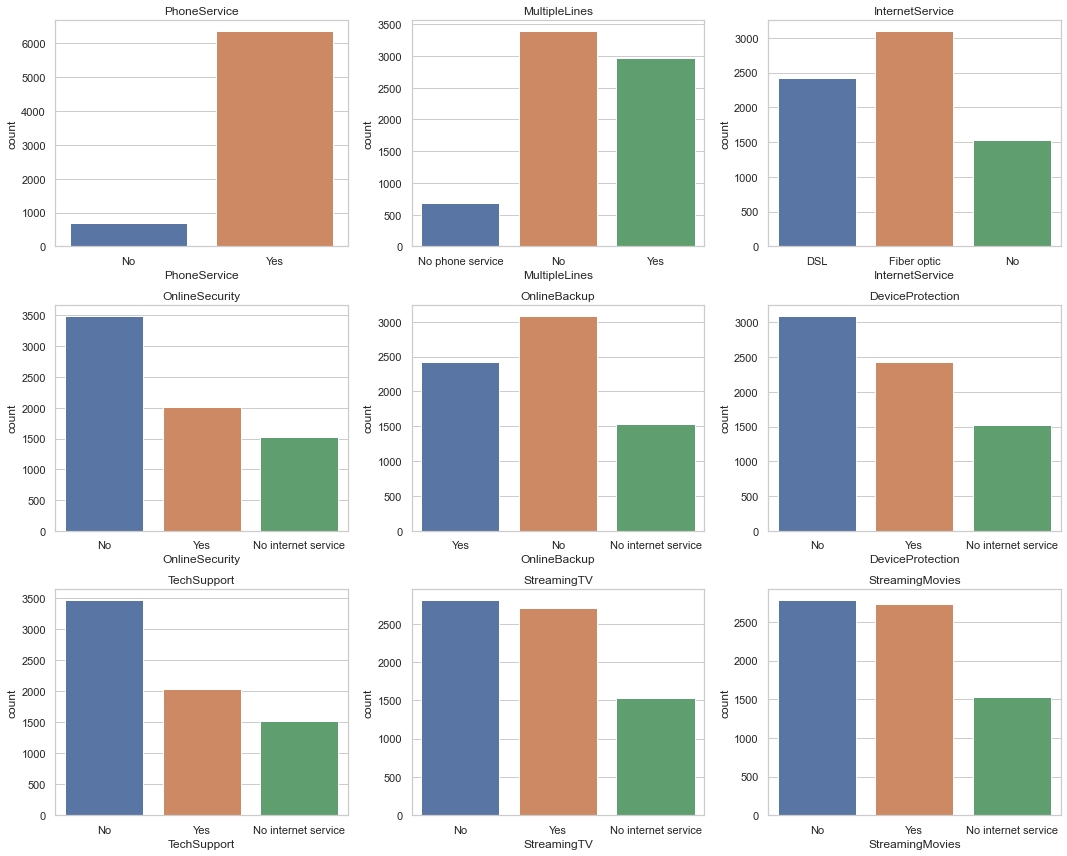

In [22]:
columns_of_interest = df.iloc[:,6:15]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, col in enumerate(columns_of_interest):
    sns.countplot(x=col, data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(col)

plt.tight_layout()
plt.show()

<h3>Diagrama de caixa(boxplot)</h3>

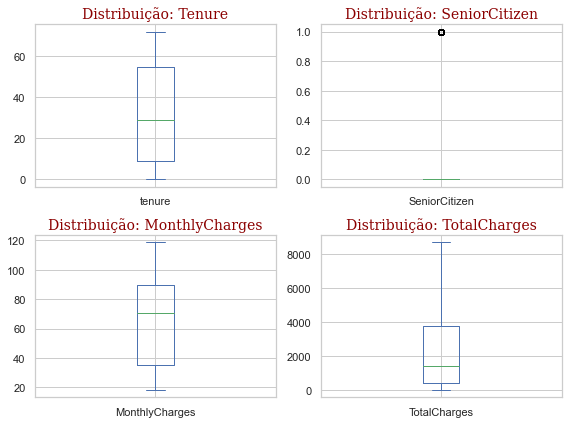

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

df.tenure.plot(kind='box', ax=ax[0, 0])
df.SeniorCitizen.plot(kind='box', ax=ax[0, 1])
df.MonthlyCharges.plot(kind='box', ax=ax[1, 0])
df.TotalCharges.plot(kind='box', ax=ax[1, 1])

ax[0, 0].set_title('Distribuição: Tenure', fontdict=font)
ax[0, 1].set_title('Distribuição: SeniorCitizen', fontdict=font)
ax[1, 0].set_title('Distribuição: MonthlyCharges', fontdict=font)
ax[1, 1].set_title('Distribuição: TotalCharges', fontdict=font)

plt.tight_layout()
plt.show()

Analisando o grafico acima, concluimos que:
<ol>
    <li>No grafico 'tenure'</li>
        <ul>
            <li>Maxima: 72</li>
            <li>Minima: 0</li>
            <li>Media: 32,37</li>
        </ul>
    <li>No grafico 'SeniorCitizen'</li>
        <ul>
            <li>Maxima: 1</li>
            <li>Minima: 0</li>
        </ul>
    <li>No grafico 'MonthlyChanges'</li>
        <ul>
            <li>Maxima: 118,75</li>
            <li>Minima: 18,25</li>
            <li>Media: 64,76</li>
        </ul>
    <li>No grafico 'TotalCharges'</li>
        <ul>
            <li>Maxima: 8684,80</li>
            <li>Minima: 18,80</li>
            <li>Media: 2281,91</li>
        </ul>
</ol>


<h3>Gráfico de dispersão</h3>

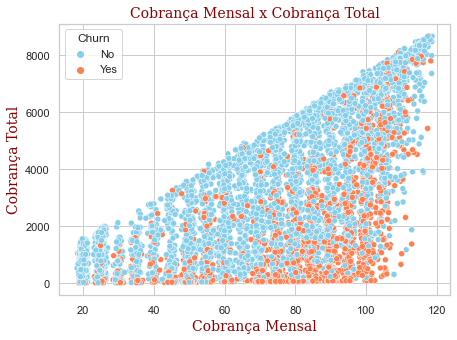

In [24]:
fig = plt.figure(figsize=(7, 5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn' ,data=df, palette=palette_churn)
plt.xlabel('Cobrança Mensal', fontdict=font)
plt.ylabel('Cobrança Total', fontdict=font)
plt.title('Cobrança Mensal x Cobrança Total', fontdict=font)
plt.show()

Observamos que as cobrancas totais aumentam à medida que aumenta a fatura mensal de um cliente.

<h3>Matriz de Correlação</h3>

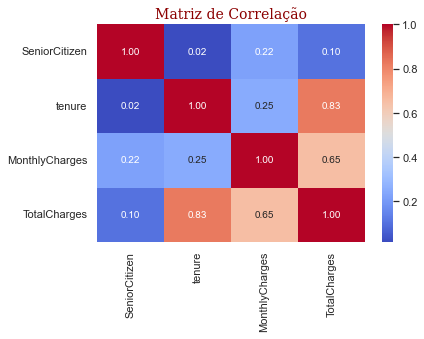

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação', fontdict=font)
plt.show()

<h2>5. Criação do Modelo </h2>

Removeremos as colunas "customerID" e "gender" porque não demonstraram relevância para a variável alvo.

In [26]:
clean_df = df.copy()
to_drop = ['customerID','gender']
clean_df.drop(columns=to_drop, inplace=True)
clean_df['Churn'] = clean_df['Churn'].map({'Yes': 1, 'No': 0})

<h2>Conjunto de Treino e Teste</h2>

A divisão dos dados em conjuntos de treinamento e teste permite que o modelo seja treinado nos dados de treinamento e, em seguida, avaliado em dados de testes independentes. Isso ajuda a verificar se o modelo é capaz de generalizar bem para novos dados e evitar overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para dados não vistos.

Alem disso, vamos especificar a opcao `stratify`, que garante que a proporção das classes na variavel alvo seja mantida nos dois conjuntos. Isso é especialmente útil quando temos classes desbalanceadas.

In [27]:
X = clean_df.drop(columns='Churn')
y = clean_df['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=clean_df['Churn'], 
                                                    shuffle=True, 
                                                    test_size = 0.15,
                                                    random_state=45)

<h2>Pipeline</h2>

Aqui estamos definindo um pipeline de pré-processamento e modelagem para lidar com os dados do conjunto de dados<br>

1. Separamos os dados categóricos na variável `categorical_cols` e os dados numéricos na variável `numerical_cols`.
1. Na variável `preprocessor`, estamos usando a classe `ColumnTransformer` para aplicar transformações específicas.
    * A transformação 'one-hot' usa o `OneHotEncoder` para converter as colunas categóricas em representações numéricas.
    * A transformação 'minmax' usa o `MinMaxScaler` para dimensionar as colunas numéricas para um intervalo entre 0 e 1.
1. Na variável `pipeline`, estamos usando um Pipeline para combinar o pré-processamento com um modelo de aprendizado de máquina.

In [29]:
# Separando as colunas categóricas e numéricas
categorical_cols = [col for col in clean_df.columns if clean_df[col].dtype == 'object']
numerical_cols = [col for col in clean_df.columns[:-1] if clean_df[col].dtype == 'int64' 
                                                        or clean_df[col].dtype == 'float64'] # [:-1] para remover a coluna 'Churn'
# Definição do preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('one-hot', OneHotEncoder(), categorical_cols),
        ('minmax', MinMaxScaler(), numerical_cols)
])
# Definição do pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', None)
])

No pipeline a etapa `model` esta definida como `None` pois vamos usar o pipeline em uma função com varios modelos.

A intenção é que, entre esses modelos, o que apresentar a métrica Recall Score mais favorável será selecionado.

<h2>Análise da correlação entre variáveis pré-processadas(x) e a variável dependente(y)</h2>

In [32]:
transformed_data = preprocessor.fit_transform(X)
transformed_x = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

concatenated_transformed_df = pd.concat([transformed_x, y], axis=1) # concatenando as colunas transformadas com a coluna 'Churn'

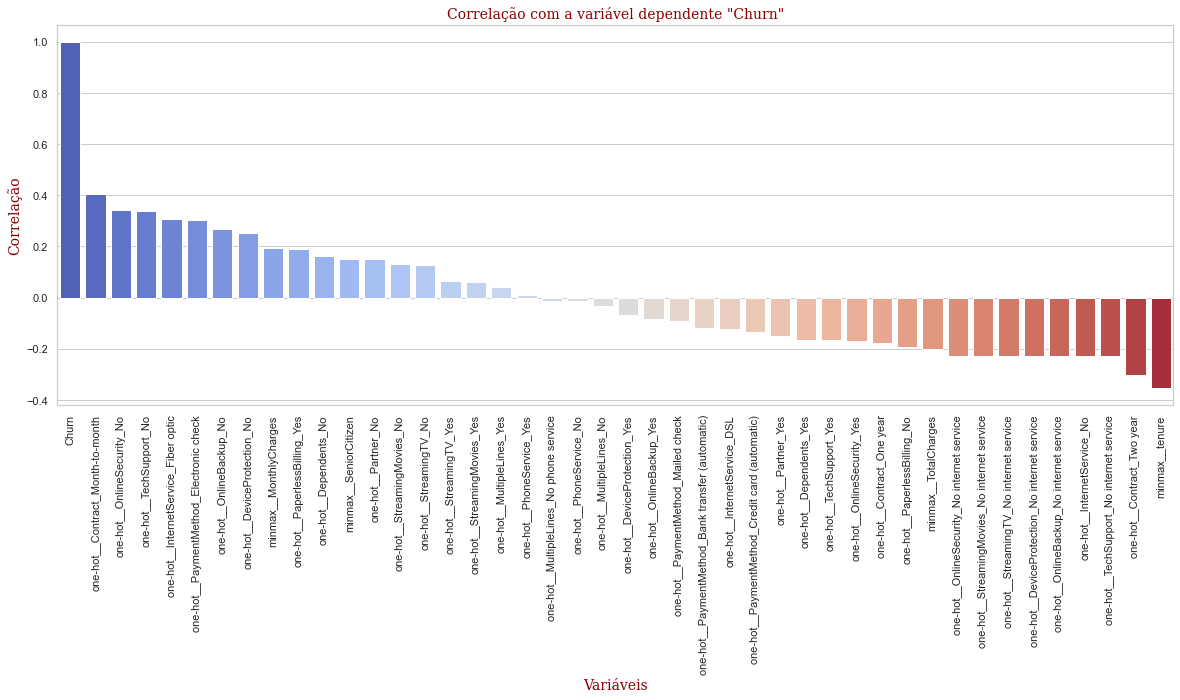

In [33]:
fig = plt.figure(figsize=(20, 7))
corr = concatenated_transformed_df.corr()['Churn'].sort_values(ascending=False)
sns.barplot(x=corr.index, y=corr, palette='coolwarm')
plt.title('Correlação com a variável dependente "Churn"', fontdict=font)
plt.xlabel('Variáveis', fontdict=font)
plt.ylabel('Correlação', fontdict=font)
plt.xticks(rotation=90)
plt.show()

As barras representam a magnitude da correlação, onde barras mais altas indicam uma correlação mais forte .

As barras <mark style="background-color: #3489eb"> azuis</mark> indicam uma <strong>correlação positiva</strong> com a variável "Churn". Ou seja, um aumento em uma variável numérica ou pertencimento a uma categoria específica da variável "X" está associado a um <strong>aumento na variável "Churn".</strong>

As barras <mark style="background-color: red"> vermelhas</mark> indicam uma <strong>correlação negativa</strong> com a variável "Churn". Ou seja, um aumento em uma variável numérica ou pertencimento a uma categoria específica da variável "X" está associado a uma <strong>diminuição na variável "Churn".</strong>


<h2>Função - Validação de varios modelos</h2>

Essa função, chamada `evaluate_models_df`, avalia o desempenho de varios modelos de aprendizado de maquina. Ela recebe como estrada o pipeline, os conjuntos de treinamento e teste e detalhes adicionais sobre o experimento.

A função itera sobre uma lista de <strong>modelos</strong> pré-definidos, que incluem <strong>Logistic Regression, K-Nearest Neighbors, Decision Tree Classifier, Random Forest, Support Vector Machine (SVM) e XGBoost.</strong> Para cada modelo, o pipeline é ajustado aos dados de treinamento e, em seguida, é feita a <strong>previsão nos dados de teste.</strong>

A função calcula várias <strong>métricas</strong> de avaliação de desempenho, incluindo <strong>Accuracy Score, Precision Score, Recall Score, F1 Score, AUC-ROC e AUC-PR.</strong> Essas métricas são armazenadas em um DataFrame, juntamente com o nome do modelo e os detalhes adicionais fornecidos. O DataFrame resultante é retomado como saída da função.


In [34]:
def evaluate_models_df(pipeline ,X_train, y_train, X_test, y_test, details):

    models = {
        'LogisticRegression': LogisticRegression(),
        'KNearest': KNeighborsClassifier(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'SVM': SVC(probability=True), 
        'XGBoost': XGBClassifier(eval_metric='logloss'), # logloss - Bom para classificação binária
    }

    sample = []
    for key, model in models.items():
        pipeline.set_params(model=model)  # Definindo o modelo no pipeline dinamicamente
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1] 
        
        sample.append([key, 
                       accuracy_score(y_test, y_pred),  # Accuracy Score = (TP + TN) / (TP + TN + FP + FN)
                       precision_score(y_test, y_pred),  # Precision Score = TP / (TP + FP)
                       recall_score(y_test, y_pred),  # Recall Score = TP / (TP + FN)
                       f1_score(y_test, y_pred),  # F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
                       roc_auc_score(y_test, y_proba),  # Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
                       average_precision_score(y_test, y_proba),  # Area Under the Precision-Recall Curve (AUC-PR)
                       details
                       ])

    models_df = pd.DataFrame(sample, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC-ROC', 'AUC-PR','Details'])
    return models_df

Para avaliar o desempenho dos modelos, aplicaremos a função `evaluate_models_df` no pipeline, passando como entrada o conjunto de treinamento e teste.

In [35]:
df_models = evaluate_models_df(pipeline, X_train, y_train, X_test, y_test, 'Desbalanceado')

In [36]:
df_models.sort_values(by='Recall Score', ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,AUC-ROC,AUC-PR,Details
0,LogisticRegression,0.801325,0.644628,0.557143,0.597701,0.845817,0.652470,Desbalanceado
1,KNearest,0.763482,0.556818,0.525000,0.540441,0.770045,0.490569,Desbalanceado
5,XGBoost,0.787133,0.616034,0.521429,0.564797,0.828656,0.639335,Desbalanceado
4,SVM,0.794702,0.640000,0.514286,0.570297,0.790044,0.612230,Desbalanceado
2,DecisionTreeClassifier,0.734153,0.498182,0.489286,0.493694,0.657791,0.381611,Desbalanceado
3,RandomForest,0.792810,0.651741,0.467857,0.544699,0.832023,0.623141,Desbalanceado


Ao avaliar as métricas dos modelos no DataFrame, constatamos que nenhum deles obteve um <strong>Recall Score</strong> satisfatório, que é a <strong>proporção de exemplos positivos que o modelo classificou corretamente em relação a todos os exemplos positivos. </strong>

Acreditamos que isso possa ser atribuído ao desequilíbrio nos dados. Por isso, vamos proceder com o balanceamento dos dados e realizar novos testes nos modelos.

<h2>Balanceamento dos Dados</h2>

Um dataset que possua <strong>mais de 50% das entradas em uma classe</strong> já é considerado <strong>desbalanceado.</strong>

Ao treinar um modelo de classificação com uma <strong>variável desbalanceada</strong>, podemos encontrar <strong>alguns problemas</strong>. Isso ocorre porque o padrão de dados da <strong>classe dominante se sobressai</strong> em relação aos da classe com menor frequência.

Geralmente, nas bases de dados que possuem a variável alvo desbalanceada, a classe com menor frequência é justamente a que temos interesse em prever. Isso torna os problemas ainda maiores, pois o modelo pode aprender a identificar apenas a classe dominante, ignorando a classe com menor frequência.

Para contornar esses problemas gerados pela base de dados desbalanceada, <strong>Uma maneira de corrigir o problema é por meio de amostragem que contém duas técnicas: undersampling e oversampling.</strong>

<h2>Amostragem</h2>

<h3>Undersampling</h3>

Undersampling é uma técnica de balanceamento de dados que consiste em <strong>diminuir a quantidade de dados da classe majoritária</strong>, mantendo todos os dados da classe minoritária. O objetivo é que o conjunto de dados resultante tenha uma <strong>distribuição equilibrada entre as classes</strong>, o que pode <strong>melhorar o desempenho de modelos de aprendizado de máquina.</strong>

Vantagens do undersampling:

* Pode <strong>melhorar o desempenho de modelos de aprendizado</strong> de máquina em conjuntos de dados desbalanceados.
* Pode <strong>reduzir o tempo de execução de códigos</strong>, uma vez que a quantidade de dados será bem menor.

Desvantagens do undersampling:

* Pode levar à <strong>perda de informações importantes</strong>, pois os dados da classe majoritária são reduzidos.
* Pode levar a um <strong>viés no conjunto de dados resultante</strong>, se a classe majoritária for <strong>representativa da população real.</strong>

<h3>Oversampling</h3>

Oversampling é uma técnica de balanceamento de dados que consiste em <strong>aumentar a quantidade de dados da classe minoritária</strong>, até que o conjunto de dados resultante tenha uma <strong>distribuição equilibrada entre as classes.</strong> O objetivo é que o modelo de aprendizado de máquina seja capaz de <strong>aprender com os dados da classe minoritária, que geralmente são sub-representados nos conjuntos de dados desbalanceados.</strong>

Vantagens do oversampling:

* Pode <strong>melhorar o desempenho de modelos de aprendizado</strong> de máquina em conjuntos de dados desbalanceados.
* <strong>Não leva à perda de informações importantes</strong>, pois os dados da classe majoritária não são alterados.

Desvantagens do oversampling:

* Pode levar a um <strong>sobreajuste</strong>, pois os dados da <strong>classe minoritária são duplicados.</strong>
* Pode <strong>aumentar o tempo de execução e o armazenamento</strong>, pois o conjunto de dados resultante terá mais dados.

Como queremos <strong>melhorar o reconhecimento da classe minoritária</strong>, utilizaremos a <strong>técnica de undersampling</strong>.

In [37]:
under = RandomUnderSampler(sampling_strategy="majority")
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)

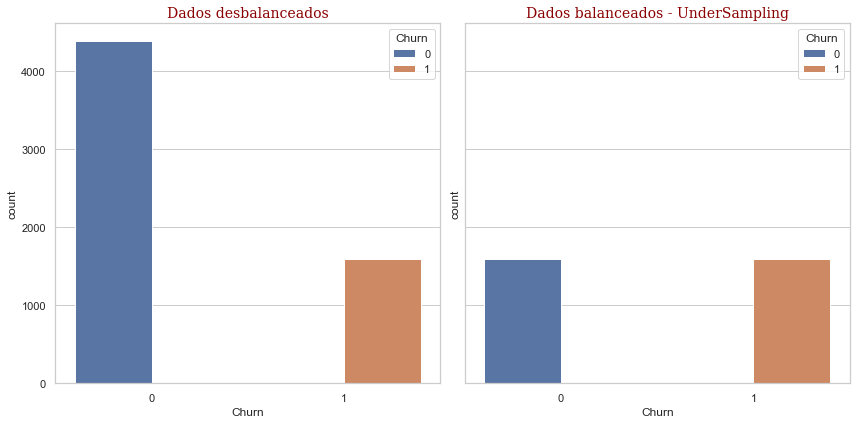

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey = True,figsize=(12,6))

sns.countplot(x=y_train, hue=y_train,ax=ax1)
ax1.set_title('Dados desbalanceados', fontdict=font)

sns.countplot(x=y_train_resampled, hue=y_train_resampled,ax=ax2)
ax2.set_title('Dados balanceados - UnderSampling',fontdict=font)

plt.tight_layout()
plt.show()

Para avaliar o desempenho dos modelos nos dados balanceados, aplicaremos a função `evaluate_models_df` nos dados e salvaremos o resultado em um novo DataFrame, chamado `df_under_models`.


In [ ]:
df_under_models = evaluate_models_df(pipeline,X_train_resampled, y_train_resampled, X_test, y_test, 'Undersampling')

Após o treinamento e o teste nos dados balanceados, vamos juntar o DataFrame desbalanceado com o DataFrame balanceado para uma análise geral.

In [ ]:
combined_models_df = pd.concat([df_models, df_under_models], ignore_index=True)

In [ ]:
combined_models_df.sort_values(by='Recall Score', ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,AUC-ROC,AUC-PR,Details
6,LogisticRegression,0.752129,0.520548,0.814286,0.635097,0.843744,0.651147,Undersampling
10,SVM,0.731315,0.495556,0.796429,0.610959,0.826618,0.618336,Undersampling
7,KNearest,0.686850,0.448276,0.789286,0.571798,0.784485,0.486148,Undersampling
9,RandomForest,0.736045,0.501182,0.757143,0.603129,0.832177,0.629798,Undersampling
11,XGBoost,0.714286,0.475000,0.746429,0.580556,0.823200,0.625588,Undersampling
8,DecisionTreeClassifier,0.649007,0.399558,0.646429,0.493861,0.647518,0.351661,Undersampling
0,LogisticRegression,0.801325,0.644628,0.557143,0.597701,0.845817,0.652470,Desbalanceado
1,KNearest,0.763482,0.556818,0.525000,0.540441,0.770045,0.490569,Desbalanceado
5,XGBoost,0.787133,0.616034,0.521429,0.564797,0.828656,0.639335,Desbalanceado
4,SVM,0.794702,0.640000,0.514286,0.570297,0.790044,0.612230,Desbalanceado


Com base nos resultados apresentados no DataFrame, o modelo <strong>LogisticRegression</strong> com a amostragem <strong>UnderSampling</strong> foi o que apresentou o melhor <strong>recall score</strong>, com um valor de <strong>0,81</strong>. Este valor é considerado satisfatório, pois indica que o modelo é capaz de <strong>identificar corretamente a maioria dos casos positivos.</strong>

Para obter uma análise mais detalhada dos resultados, iremos passar o modelo pela função abaixo.

<h2>Função - Validação de um modelo</h2>

A função `evaluate_model` exibe as métricas de avaliação do modelo escolhido e plota a matriz de confusão e a curva AUC-ROC em um gráfico.

In [ ]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Treinando o modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculando as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Mostrando as métricas
    print(f'Métricas de avaliação do modelo {model_name}:')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Matriz de Confusão
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='YlOrRd', ax=ax[0])
    ax[0].set_title(f" {model_name} - Confusion Matrix")

    # Curva AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], 'r--')
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('Curva AUC-ROC', fontsize=16, fontweight='bold')
    ax[1].set_xlabel('Taxa de Falso Positivo')
    ax[1].set_ylabel('Taxa de Verdadeiro Positivo')
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

<h2>Logistic Regression com Undersampling</h2>

In [ ]:
# Definindo o modelo
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log', LogisticRegression())
])

Métricas de avaliação do modelo Logistic Regression:
Acurácia: 0.7521
Precisão: 0.5205
Recall: 0.8143
F1 Score: 0.6351
AUC-ROC: 0.8437


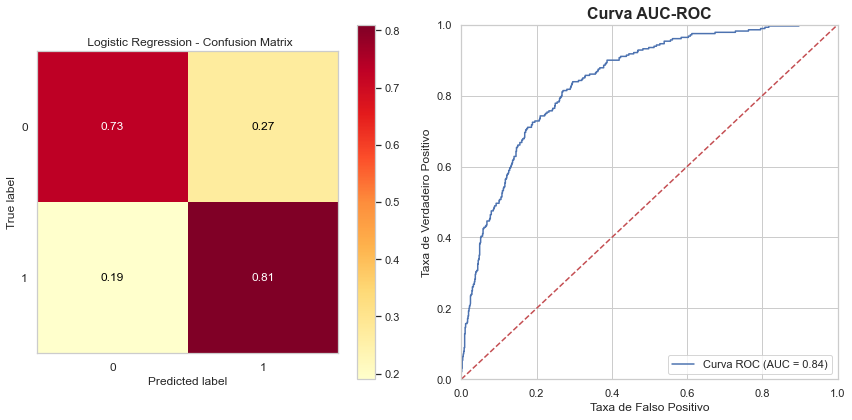

In [ ]:
evaluate_model(best_model, 'Logistic Regression', X_train_resampled, y_train_resampled, X_test, y_test)

<h2>Otimização dos Hiperparâmetros - Logistic Regression</h2>

Existem <strong>várias técnicas</strong> de otimização de hiperparâmetros, incluindo <strong>busca em grade(Grid Search) e otimização bayesiana(BayesSearchCV).</strong>

1. GridSearch
    * A busca em grade é uma <strong>técnica simples</strong> que testa todas as combinações possíveis de valores para os hiperparâmetros.
    * pode ser muito <strong>lenta e computacionalmente cara</strong>

1. BayesSearchCV    
    * A otimização bayesiana é uma <strong>técnica mais sofisticada</strong> que usa um modelo probabilístico para representar a incerteza sobre os hiperparâmetros.
    * permite encontrar os hiperparâmetros com <strong>maior probabilidade de produzir o melhor desempenho.</strong>

No nosso caso, vamos usar a <strong>otimização bayesiana.</strong> Essa técnica é <strong>mais eficiente</strong> que a busca em grade e geralmente <strong>produz melhores resultados.</strong>

In [ ]:
# Definindo o espaço de busca dos hiperparâmetros
search_space = {
    'log__C': (1e-6, 1e+6, 'log-uniform'),  # Hiperparâmetro C da regressão logística
    'log__penalty': ['l2',None],  # Tipo de regularização
}

# Definindo o BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=best_model,
    search_spaces=search_space,
    n_iter=50,  # Número de iterações de busca
    cv=StratifiedKFold(n_splits=5),  # Estratégia de validação cruzada
    n_jobs=-1,  # Usar todos os núcleos do processador
    verbose=1  # Exibir informações durante a busca
)

# Executando a busca de hiperparâmetros
bayes_search.fit(X_train_resampled,y_train_resampled)  

# Obtendo os melhores hiperparâmetros encontrados
best_params = bayes_search.best_params_

# Imprimindo os melhores hiperparâmetros
print('Os melhores hiperparâmetros encontrados foram:')
print(best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

<h2>Logistic Regression com otimização dos hiperparâmetros e undersamplig</h2>

Métricas de avaliação do modelo Logistic Regression:
Acurácia: 0.7455
Precisão: 0.5121
Recall: 0.8286
F1 Score: 0.6330
AUC-ROC: 0.8449


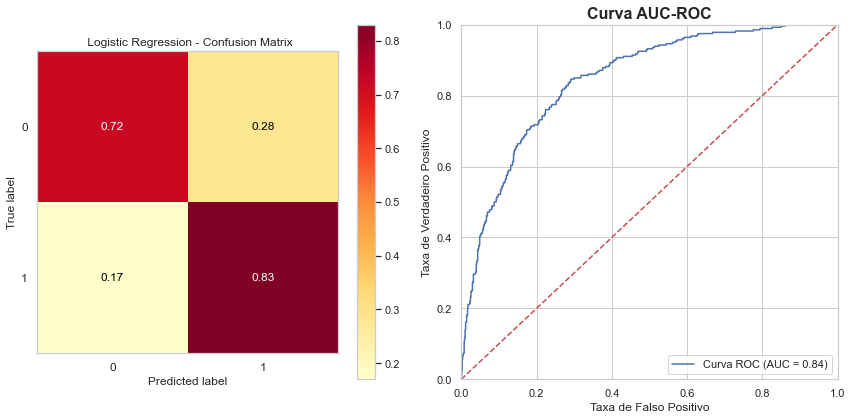

In [ ]:
# Obtendo o melhor modelo
final_model = bayes_search.best_estimator_ 
# Imprimindo o melhor modelo
evaluate_model(final_model, 'Logistic Regression', X_train_resampled,y_train_resampled, X_test, y_test)

<h2>Conclusão</h2>

Neste projeto, realizamos uma análise de dados e construímos um modelo de classificação para prever o cancelamento de serviço do cliente

Começamos realizando a limpeza dos dados, tratando valores ausentes, convertendo variáveis categóricas em numéricas. Em seguida, exploramos os dados, identificando as características disponíveis e a distribuição das classes e dividindo o conjunto de dados em treinamento e teste.

Em seguida, treinamos vários modelos de classificação, incluindo Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, SVM e XGBoost. Avaliamos o desempenho desses modelos usando métricas como acurácia, precisão, recall, F1-score e área sob a curva ROC.

Observamos que os modelos treinados nos dados desbalanceados não apresentaram um desempenho satisfatório, especialmente em relação ao recall, que é a proporção de exemplos positivos corretamente classificados em relação a todos os exemplos positivos. Isso pode ser atribuído ao desequilíbrio nos dados, onde a classe minoritária (clientes que cancelaram) é sub-representada.

Para lidar com o desequilíbrio dos dados, aplicamos a técnica de undersampling, reduzindo a quantidade de dados da classe majoritária. Treinamos novamente os modelos nos dados balanceados e observamos uma melhoria significativa no desempenho, especialmente no recall.

O modelo de Logistic Regression com undersampling foi o que apresentou o melhor desempenho, com um recall de 0,81. Isso indica que o modelo é capaz de identificar corretamente a maioria dos casos positivos.

Por fim, otimizamos os hiperparâmetros do modelo de Logistic Regression usando a técnica de otimização bayesiana. O modelo final, com os melhores hiperparâmetros encontrados, foi avaliado novamente e confirmou seu desempenho superior.

Em conclusão, este projeto demonstrou a importância de lidar com dados desbalanceados ao construir modelos de classificação. A técnica de undersampling mostrou-se eficaz para melhorar o desempenho do modelo, especialmente no caso de identificar casos positivos. Além disso, a otimização dos hiperparâmetros permitiu melhorar ainda mais o desempenho do modelo final.